<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Evaluación de métodos de clasificación para la base de datos *Fetal Health*

Este *Notebook* contiene el trabajo necesario para cargar el fichero *.csv* de la base de datos de **Kaggle** sobre *salud fetal*, así como para aplicar diferentes tipos de métodos de clasificación sobre dicha base de datos.

## Autor
- Pedro Latorre Carmona
- Daniel Alonso Báscones

### Curso
- 2022-2023

**Kaggle** es, digamos, un repositorio, donde podemos encontrar bases de datos, así como diferentes tipos de métodos (código), para tareas que pueden ir desde la clasificación, regresión, por citar sólo dos ejemplos:

https://www.kaggle.com/

Dentro de **Kaggle**, vamos a trabajar con la base de datos de **Fetal Health**, la cual puede encontrarse en:

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

---
Tal y como se establece en esta página:

"La reducción de la mortalidad infantil se refleja en varios de los Objetivos de Desarrollo Sostenible de las Naciones Unidas y es un indicador clave del progreso humano. La ONU espera que para 2030, los países pongan fin a las muertes prevenibles de recién nacidos y niños menores de 5 años, con el objetivo de reducir la mortalidad de menores de 5 años al menos a 25 por cada 1000 nacidos vivos.

Paralelamente a la noción de mortalidad infantil está, por supuesto, la mortalidad materna, que representa 295000 muertes durante y después del embarazo y el parto (a fecha de $2017$). La gran mayoría de estas muertes ($94\%$) ocurrieron en entornos de bajos recursos y la mayoría podría haberse evitado.

A la luz de lo mencionado anteriormente, los cardiotocogramas (CTG) son una opción simple y económicamente accesible para evaluar la salud fetal, lo que permite a los profesionales de la salud tomar medidas para prevenir la mortalidad infantil y materna. El equipo en sí funciona enviando pulsos de ultrasonido y leyendo su respuesta, establciendo la frecuencia cardíaca fetal (FCF), los movimientos fetales, las contracciones uterinas y más."

---
### Datos

Este conjunto de datos contiene $2126$ registros de características extraídas de exámenes de cardiotocograma, que luego fueron clasificados por tres obstetras expertos, en $3$ clases:

1. Normal
2. Sospechosa
3. Patológica

Esta base de datos es en realidad un fichero **.csv** que tiene una tabla en la que cada fila es un **dato** asociado a un **ejemplo**. Dentro de cada fila (data), tenemos un conjunto de **atributos** o características, que conforman el vector con el que describimos dicho dato (denominado **vector de características**).

---
### Objetivo

El objetivo del trabajo a continuación es crear el conjunto de datos $(\mathbf{X,Y})$, generar los conjuntos de **entrenamiento** y **test** y aplicar dos métodos de clasificación:

1. Support Vector Machines (SVM)
2. Multilayer perceptron

Se tendrán que mostrar los resultados de clasificación de diferentes formas, y analizarlos.

---
Para el método de clasificación de **Support Vector Machines** (SVMs), se dará en clase una pequeña introducción, aunque se puede encontrar información muy fácilmente, ya que es un método muy usado:

https://en.wikipedia.org/wiki/Support_vector_machine

El clasificador denominado **Perceptrón multicapa** (**Multilayer perceptron**), no lo veremos, simplemente lo usaremos, aunque se puede encontrar información, por ejemplo, en (por ejemplo):

https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa

## Carga de la base de datos y aplicación de los métodos de clasificación


Para gestionar los datos en el fichero **.csv**, vamos a utilizar la estructura de datos de **Pandas dataframe**, cuyos detalles pueden encontrarse en:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

En concreto, vamos a utilizar la opción que nos permite leer ficheros **.csv**, y que se encuentra en:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [17]:
'''
Importación de librerías
'''
import pandas as pd
import numpy as np
import pickle
import os

from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

In [18]:
'''
Datos
'''
# Nombre_del_fichero_que_querais_darle = path + os.sep + "fetal_health.csv"

path = "./FetalData"
data = path + os.sep + "fetal_health.csv"



### Carga del fichero csv como un *data frame*

In [19]:
# Utilizad la opción "pd.read_csv"

df = pd.read_csv(data)

<div class="relative lg:w-[calc(100%-115px)] w-full flex flex-col">
<div class="min-h-[20px] whitespace-pre-wrap flex flex-col items-start gap-4">
<div class="request-:r0:-3 markdown prose dark:prose-invert break-words dark">
<div class="min-h-[20px] whitespace-pre-wrap flex flex-col items-start gap-4">
<div class="request-:r0:-4 markdown prose dark:prose-invert break-words dark">
<p><span style="color: #00ff00;">La funci&oacute;n <code>pd.read_csv</code> de Pandas se utiliza para leer el contenido del archivo CSV y cargarlo en un dataframe de Pandas llamado <code>df</code>.</span></p>
<p><span style="color: #00ff00;">La funci&oacute;n <code>pd.read_csv</code> toma como entrada la ruta al archivo CSV y devuelve un dataframe de Pandas que contiene los datos del archivo. Los datos se organizan en filas y columnas, donde cada fila representa una observaci&oacute;n y cada columna representa una caracter&iacute;stica o una variable. Una vez que se ha cargado el dataframe, se puede acceder a los datos de distintas maneras utilizando las funciones y m&eacute;todos de Pandas.</span></p>
</div>
</div>
</div>
</div>
</div>

In [20]:
# Visualizad el "data frame" usando la opción "display"

display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Creación de los conjuntos **X** e **y**

Una vez creado el data frame, tenéis que crear los conjuntos $\mathbf{X}$ e $\mathbf{Y}$, del que luego se crea sus correspondientes conjuntos de **entrenamiento** y **test**. 

<p><span style="color:#8e44ad">En este codigo:<br />
Se asigna a <code>y</code>, la columna &quot;fetal_health&quot; del dataframe, y est&aacute; convirtiendo su valor a un tipo de datos int<br />
Se asigna a la variable <code>X_all</code>, la columna &quot;baseline value&quot; del dataframe </span></p>

In [21]:
y = df.fetal_health.values.astype(int)

caract_cols = [
    "baseline value",
    "accelerations",
    "fetal_movement",
    "uterine_contractions",
    "light_decelerations",
    "severe_decelerations",
    "prolongued_decelerations",
    "abnormal_short_term_variability",
    "mean_value_of_short_term_variability",
    "percentage_of_time_with_abnormal_long_term_variability",
    "mean_value_of_long_term_variability",
    "histogram_width",
    "histogram_min",
    "histogram_max",
    "histogram_number_of_peaks",
    "histogram_number_of_zeroes",
    "histogram_mode",
    "histogram_mean",
    "histogram_median",
    "histogram_variance",
    "histogram_tendency"
    # "fetal_health"
]



X_all = df[caract_cols].values

In [22]:
print(X_all.shape)

(2126, 21)


<p><span style="color:#8e44ad">Este c&oacute;digo define una lista de conjuntos de datos y una lista de nombres de conjunto de datos. La lista <code>datasets</code> contiene una tupla que incluye el conjunto de datos de entrada (X_all) y el conjunto de datos de salida (y). La lista <code>dataset_names</code> contiene un nombre para este conjunto de datos, &quot;Data All&quot;.</span></p>

<p><span style="color:#8e44ad">Luego, se imprime la lista <code>datasets</code> para mostrar su contenido. Esto podr&iacute;a ser &uacute;til para verificar que se han cargado correctamente los conjuntos de datos y que se est&aacute;n utilizando los nombres correctos para cada conjunto de datos.</span></p>


In [23]:
'''
Listado de datos y nombres
'''

datasets = [(X_all, y)]
dataset_names = ["Data All"]

print(datasets)

[(array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]]), array([2, 1, 1, ..., 2, 2, 1]))]


<p><span style="color:#8e44ad">Este c&oacute;digo define el espacio de b&uacute;squeda para los par&aacute;metros de SVM. Utiliza la funci&oacute;n <code>np.logspace</code> de NumPy para definir un rango de valores para los par&aacute;metros <code>C</code> y <code>gamma</code>, y luego crea un diccionario <code>param_grid_svm</code> que contiene estos rangos de valores. Finalmente, crea un objeto <code>GridSearchCV</code> que utilizar&aacute; este diccionario para buscar los mejores valores para los par&aacute;metros <code>C</code> y <code>gamma</code> al entrenar un modelo SVM.</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n <code>np.logspace</code> toma como entrada un valor de inicio, un valor de fin, y un n&uacute;mero de puntos a generar en el rango especificado. Los valores se generan en una escala logar&iacute;tmica, lo que significa que se distribuyen de manera uniforme en una escala logar&iacute;tmica en lugar de una escala lineal. Esto puede ser &uacute;til cuando se buscan valores de par&aacute;metros que se extienden a trav&eacute;s de un rango muy amplio.</span></p>

<p><span style="color:#8e44ad">El diccionario <code>param_grid_svm</code> se utilizar&aacute; para definir el espacio de b&uacute;squeda para la b&uacute;squeda en cuadr&iacute;cula. Este diccionario asigna a cada par&aacute;metro del modelo SVM (<code>C</code> y <code>gamma</code>) una lista de valores que se probar&aacute;n al entrenar el modelo.</span></p>

<p><span style="color:#8e44ad">Finalmente, se crea un objeto <code>GridSearchCV</code> que se encargar&aacute; de entrenar un modelo de clasificaci&oacute;n SVM utilizando la b&uacute;squeda en cuadr&iacute;cula. Este objeto toma como entrada un modelo SVM, un diccionario de par&aacute;metros de b&uacute;squeda en cuadr&iacute;cula, y el n&uacute;mero de veces que se debe realizar la validaci&oacute;n cruzada anidada (nested_cv). La validaci&oacute;n cruzada anidada se utiliza para evaluar el desempe&ntilde;o del modelo y encontrar los mejores valores para los par&aacute;metros</span></p>


In [24]:
'''
Definición del espacio de búsqueda para la optimización de los parámetros de SVM
'''

# Para definir el rango de "C" y de "gamma", tenéis que usar la opción "np.logspace", cubriendo, para "C", 
# desde 1.0e-2 hasta 1.0e+10, y para "gamma", desde 1.0e-9, hasta 1.0e+3.


C_range         = np.logspace(-2, 10, 13)
gamma_range     = np.logspace(-9,  3, 13)
param_grid_svm  = dict(gamma=gamma_range, C=C_range)
nested_cv       = 5

grid_svm        = GridSearchCV(
                    SVC(), 
                    param_grid = param_grid_svm, 
                    cv = nested_cv
                )

In [25]:
# Aquí se muestra el rango de valores a considerar
C_range, gamma_range

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
 array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]))

<p style="text-align:left"><span style="color:#8e44ad">Se buscan los mejores par&aacute;metros para un modelo de red neuronal de perceptrones m&uacute;ltiples (MLP, por sus siglas en ingl&eacute;s). La funci&oacute;n <code>GridSearchCV</code> de la biblioteca <code>scikit-learn</code> se utiliza para buscar los mejores par&aacute;metros para el modelo en un conjunto de datos.</span></p>

<p style="text-align:left"><span style="color:#8e44ad">La variable <code>alpha_range</code> contiene una lista de valores para el par&aacute;metro <code>alpha</code>, que es un par&aacute;metro de regularizaci&oacute;n del modelo MLP. La variable <code>hidden_layer_sizes_range</code> contiene una lista de tuplas con diferentes tama&ntilde;os de capa oculta para el modelo. Estos dos par&aacute;metros se especifican en un diccionario llamado <code>param_grid_mlp</code>.</span></p>

<p style="text-align:left"><span style="color:#8e44ad">La funci&oacute;n <code>GridSearchCV</code> se utiliza para buscar los mejores par&aacute;metros para el modelo MLP en el espacio de b&uacute;squeda definido por <code>param_grid_mlp</code>. La variable <code>grid_mlp</code> contiene el resultado de la b&uacute;squeda. Esto se puede usar para entrenar el modelo con los par&aacute;metros &oacute;ptimos y luego utilizarlo para hacer predicciones en nuevos datos.</span></p>


In [26]:
'''
Definición del espacio de búsqueda para MLP
'''
alpha_range                 =   np.logspace(-5, -1, 5)
hidden_layer_sizes_range    =   [(50,), (100,), (200,), (500,), (1000,)]
param_grid_mlp              =   dict(
                                    alpha = alpha_range, 
                                    hidden_layer_sizes = hidden_layer_sizes_range
                                )
grid_mlp                    =   GridSearchCV( 
                                    MLPClassifier( max_iter=1000, early_stopping = True), 
                                    param_grid = param_grid_mlp, 
                                    cv = nested_cv
                                )

<p><span style="color:#8e44ad">Este c&oacute;digo define dos clasificadores, uno basado en SVM y otro en MLP.<br />
La variable <code>cls_names</code> contiene una lista de los nombres de estos clasificadores, mientras que la variable <code>classifiers</code> contiene una lista de los objetos de clasificador correspondientes.</span></p>

<p><span style="color:#8e44ad">Para cada clasificador, se est&aacute; utilizando la funci&oacute;n <code>make_pipeline</code> de scikit-learn para crear un objeto <code>Pipeline</code> que contiene dos etapas: primero, un objeto <code>StandardScaler</code> que se encarga de escalar los datos de entrada para que tengan una media cero y una desviaci&oacute;n est&aacute;ndar de uno, y luego un objeto <code>GridSearchCV</code> que se encarga de entrenar un modelo de clasificaci&oacute;n utilizando los par&aacute;metros &oacute;ptimos encontrados mediante b&uacute;squeda en cuadr&iacute;cula.</span></p>

<p><span style="color:#8e44ad">En este caso, se est&aacute;n utilizando dos objetos <code>GridSearchCV</code> diferentes, <code>grid_svm</code> y <code>grid_mlp</code>, que se utilizan para entrenar modelos SVM y MLP, respectivamente. Estos objetos <code>GridSearchCV</code> deben haber sido definidos previamente en su c&oacute;digo, y deben contener los par&aacute;metros de b&uacute;squeda en cuadr&iacute;cula que desee utilizar para entrenar los modelos de clasificaci&oacute;n.</span></p>

In [27]:
'''
Conjunto de clasificadores usados, así como sus nombres.
'''

cls_names = ["SVM","MLP"]

classifiers = [
    make_pipeline(StandardScaler(), grid_svm),
    make_pipeline(StandardScaler(), grid_mlp)
]

<p><span style="color:#8e44ad">Este c&oacute;digo define una funci&oacute;n <code>predictions</code> que toma como entrada un modelo de clasificaci&oacute;n, junto con conjuntos de datos de entrenamiento y prueba, y devuelve las etiquetas reales y las etiquetas predichas para el conjunto de prueba.</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n comienza importando la funci&oacute;n <code>train_test_split</code> de scikit-learn, que se utilizar&aacute; para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Luego, la funci&oacute;n toma cuatro argumentos: un modelo de clasificaci&oacute;n, un conjunto de datos de entrenamiento (X_train), un conjunto de etiquetas de entrenamiento (y_train), un conjunto de datos de prueba (X_test) y un conjunto de etiquetas de prueba (y_test).</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n comienza entrenando el modelo de clasificaci&oacute;n utilizando el conjunto de entrenamiento mediante la llamada a su m&eacute;todo <code>fit</code>. Luego, utiliza el modelo entrenado para hacer predicciones en el conjunto de prueba mediante la llamada a su m&eacute;todo <code>predict</code>. Finalmente, la funci&oacute;n devuelve las etiquetas reales y las etiquetas predichas para el conjunto de prueba.</span></p>

<p><span style="color:#8e44ad">En resumen, esta funci&oacute;n permite entrenar un modelo de clasificaci&oacute;n y evaluar su desempe&ntilde;o en un conjunto de datos de prueba.</span></p>

In [28]:
# Método que ejecuta los clasificacodres y devuelve las etiquetas predichas correspondientes.

from sklearn.model_selection import train_test_split

def predictions(model, X_train, y_train, X_test, y_test):    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_test, y_pred

<p><span style="color:#8e44ad">Esta funci&oacute;n recibe cuatro argumentos: <code>X_train</code>, <code>y_train</code>, <code>X_test</code> y <code>y_test</code>, que son los conjuntos de entrenamiento y prueba, respectivamente, y un modelo de aprendizaje autom&aacute;tico (<code>model</code>).</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n realiza las siguientes acciones:</span></p>

<ol>
	<li><span style="color:#8e44ad">Imprime el nombre del modelo seguido de la cadena &quot; - &quot; en la consola.</span></li>
	<li><span style="color:#8e44ad">Llamada a una funci&oacute;n <code>predictions()</code> que recibe el modelo, el conjunto de entrenamiento (<code>X_train</code> y <code>y_train</code>) y el conjunto de prueba (<code>X_test</code> y <code>y_test</code>). La funci&oacute;n <code>predictions()</code> se supone que devuelve las predicciones del modelo en el conjunto de prueba.</span></li>
	<li><span style="color:#8e44ad">Imprime la cadena &quot;OK&quot; en la consola.</span></li>
	<li><span style="color:#8e44ad">Devuelve las predicciones del modelo en el conjunto de prueba.</span></li>
</ol>


In [29]:
def predictions_model(X_train, y_train, X_test, y_test, model):
        '''
        Predicciones con un modelo y un conjunto de datos (X e y), para obtener posteriormente las medidas que se quieren
        
        Parámetros
        ----------
        X: numpy.array
            Conjunto (características)
        Y: numpy.array
            Dataset (etiquetas)
        model: scikit_model
            modelo a entrenar
        num_folds: int
            Número de "particiones" de la validación cruzada ("k-fold" cross validation)
        
        Devuelve
        -------
        array 
            array de predicciones
        '''
        print('\t'+str(model)[:20], end=' - ')
        y_test, preds = predictions(model, X_train, y_train, X_test, y_test)
        print('OK')
        
        return y_test, preds

<p><span style="color:#8e44ad">Esta funci&oacute;n recibe un argumento <code>filename</code>, que es el nombre del archivo en el que se guardar&aacute;n los resultados de la validaci&oacute;n cruzada de los modelos de aprendizaje autom&aacute;tico.</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n realiza las siguientes acciones:</span></p>

<ol>
	<li><span style="color:#8e44ad">Importa la funci&oacute;n <code>train_test_split</code> de la biblioteca <code>sklearn.model_selection</code> para dividir los conjuntos de datos en conjuntos de entrenamiento y prueba.</span></li>
	<li><span style="color:#8e44ad">Crea un diccionario vac&iacute;o llamado <code>all_preds</code> para almacenar los resultados de la validaci&oacute;n cruzada.</span></li>
	<li><span style="color:#8e44ad">Itera sobre cada conjunto de datos en la lista <code>datasets</code>, junto con su nombre en <code>dataset_names</code>.</span></li>
	<li><span style="color:#8e44ad">Divide cada conjunto de datos en conjuntos de entrenamiento y prueba utilizando la funci&oacute;n <code>train_test_split()</code>.</span></li>
	<li><span style="color:#8e44ad">Itera sobre cada modelo de aprendizaje autom&aacute;tico en la lista <code>classifiers</code>, junto con su nombre en <code>cls_names</code>.</span></li>
	<li><span style="color:#8e44ad">Obtiene las predicciones del modelo en el conjunto de prueba utilizando la funci&oacute;n <code>predictions_model()</code>.</span></li>
	<li><span style="color:#8e44ad">Almacena las predicciones en el diccionario <code>all_preds</code> utilizando el nombre del conjunto de datos y el modelo como clave.</span></li>
	<li><span style="color:#8e44ad">Almacena los nombres de los modelos y conjuntos de datos en el diccionario <code>all_preds</code>.</span></li>
	<li><span style="color:#8e44ad">Guarda el diccionario <code>all_preds</code> en un archivo con el nombre especificado en <code>filename</code> utilizando la biblioteca <code>pickle</code></span></li>
</ol>


In [30]:
from sklearn.model_selection import train_test_split

def run_all_save(filename, test_size):
    '''
    Realiza la validación cruzada de todos los modelos y conjuntos de datos.
     
    Parámetros
    ----------
    num_folds: int
        Igual que antes
    filename: string
        Nombre del fichero que guardará las "predicciones"
        
        
    El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
    El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

    stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
    tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
    
    ''' 
    
    all_preds = {}

    for dataset, dataset_name in zip(datasets, dataset_names):
        
        
        print(dataset_name)
        X, y = dataset
                
        # Dividimos el conjunto de datos en dos subconjuntos:
        # X_train: atributos del conjunto de entrenamiento
        # X_test: atributos del conjunto de test
        # y_train: clases del conjunto de entrenamiento
        # y_test: clases del conjunto de test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=test_size,
            stratify=y
        )

        # Realizamos la prediccion para cada modelo de clasificacion
        for model, cls_name in zip(classifiers, cls_names):
            print(cls_name)
            y_test, preds = predictions_model(X_train, y_train, X_test, y_test, model)
            # ALmacenamos la prediccion
            all_preds[(dataset_name, cls_name)] = (y_test, preds)

    all_preds["cls_names"] = cls_names
    all_preds["dataset_names"] = dataset_names

    with open(filename, 'wb') as fp:
        pickle.dump(all_preds, fp)   

<p><span style="color:#8e44ad">Este c&oacute;digo se encarga de ejecutar un conjunto de experimentos y guardar los resultados en un directorio especificado. </span></p>

<ul>
	<li><span style="color:#8e44ad">Primero, se importa la biblioteca os y se define una constante base_dir_1 que contiene el nombre del directorio donde se guardar&aacute;n los resultados. </span></li>
	<li><span style="color:#8e44ad">Luego, se crea el directorio si no existe y se ejecutan nueve experimentos utilizando la funci&oacute;n run_all_save(). Cada uno de estos experimentos se guarda en un archivo diferente en el directorio especificado, con nombres que indican el porcentaje de datos utilizados en el experimento. Por ejemplo, el archivo &quot;PrediccionesFetalHealth_90_10.obj&quot; almacena los resultados del experimento en el que se utiliz&oacute; el 90% de los datos para entrenar y el 10% para probar.</span></li>
</ul>


In [ ]:
import os
import errno

# Path del directorio del test generico
base_dir_1 = "test_1" + os.sep

# Creamos el directorio si no existe
try:
    os.mkdir(base_dir_1)
except OSError as e:
    pass

# Se ejecuta cada caso de test y se almacena en el directorio especificado 
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_10_90.obj', 0.9)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_20_80.obj', 0.8)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_30_70.obj', 0.7)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_40_60.obj', 0.6)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_50_50.obj', 0.5)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_60_40.obj', 0.4)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_70_30.obj', 0.3)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_80_20.obj', 0.2)
run_all_save(base_dir_1 + 'PrediccionesFetalHealth_90_10.obj', 0.1)

# Análisis de los resultados

Si los experimentos se han realizado previamente, sólo es necesario ejecutar el *notebook* desde esta parte. 

Los resultados se *cargarían* desde el disco duro.

In [31]:
import pickle
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np


<p><span style="color:#8e44ad">La funci&oacute;n <code>evalua</code> se encarga de evaluar los resultados de un modelo de clasificaci&oacute;n. Recibe como par&aacute;metros las etiquetas de los datos de prueba (<code>y_test</code>) y las etiquetas predichas por el modelo (<code>y_pred</code>). La funci&oacute;n calcula y devuelve la exactitud del modelo, es decir, el porcentaje de aciertos del modelo en su clasificaci&oacute;n de los datos de prueba.</span></p>


In [32]:
# Función que debe evaluar los resultados de clasificación.
def evalua(y_test, y_pred):
    # Calcular la exactitud
    return accuracy_score(y_test, y_pred)

<p><span style="color:#8e44ad">La funci&oacute;n <code>conf_mat_df()</code> se utiliza para crear una matriz de confusi&oacute;n en forma de DataFrame de pandas. Una matriz de confusi&oacute;n es una tabla que se utiliza para evaluar la precisi&oacute;n de un modelo de clasificaci&oacute;n. Muestra el n&uacute;mero de veces que el modelo ha clasificado correctamente cada clase, as&iacute; como el n&uacute;mero de veces que ha cometido errores al clasificar cada clase.</span></p>

<p><span style="color:#8e44ad">La funci&oacute;n <code>conf_mat_df()</code> recibe dos par&aacute;metros:</span></p>

<ul>
	<li><span style="color:#8e44ad"><code>cm</code>: la matriz de confusi&oacute;n en s&iacute;, que debe ser un array 2D de NumPy.</span></li>
	<li><span style="color:#8e44ad"><code>labels</code>: una lista con los nombres de las clases que se utilizan en el modelo de clasificaci&oacute;n.</span></li>
</ul>

<p><span style="color:#8e44ad">La funci&oacute;n devuelve un DataFrame de pandas con la matriz de confusi&oacute;n, en el que las filas y las columnas se etiquetan con los nombres de las clases.</span></p>

<p style="text-align:left"><span style="color:#8e44ad">&nbsp;</span></p>

In [33]:
def conf_mat_df(cm, labels):
    '''
    Creación de una matriz de confusión en un DataFrame
        
        
    Parámetros
    ----------
    cm: ndarray 2D
        matriz de confusión
    labels: lista
        Lista de nombres de clase
        
    Return DataFrame
    -------
    
    ''' 

    return (
        pd.DataFrame(cm,index=labels, columns=labels)
            .rename_axis("actual")
            .rename_axis("predicted", axis=1)
    )

<p><span style="color:#8e44ad">La funci&oacute;n <code>get_results()</code> se utiliza para obtener los resultados de un modelo de clasificaci&oacute;n. Recibe un par&aacute;metro:</span></p>

<ul>
	<li><span style="color:#8e44ad"><code>filename</code>: una cadena de texto con el nombre del fichero que contiene las predicciones del modelo.</span></li>
</ul>

<p><span style="color:#8e44ad">La funci&oacute;n devuelve un diccionario con varios pares clave-valor, que incluyen la exactitud del modelo en cada clase, la matriz de confusi&oacute;n, el informe de clasificaci&oacute;n y la exactitud por clase.</span></p>

<p><span style="color:#8e44ad">Para obtener estos resultados, la funci&oacute;n realiza los siguientes pasos:</span></p>

<ol>
	<li><span style="color:#8e44ad">Carga las predicciones del modelo desde el fichero especificado.</span></li>
	<li><span style="color:#8e44ad">Obtiene la lista de nombres de clase y la lista de nombres de conjuntos de datos utilizados para entrenar y evaluar el modelo.</span></li>
	<li><span style="color:#8e44ad">Crea una lista con todos los pares de nombres de conjuntos de datos y nombres de clase, y la ordena.</span></li>
	<li><span style="color:#8e44ad">Crea un diccionario vac&iacute;o para almacenar los resultados.</span></li>
	<li><span style="color:#8e44ad">Crea un DataFrame para almacenar la exactitud del modelo en cada clase.</span></li>
	<li><span style="color:#8e44ad">Crea un DataFrame para almacenar la exactitud del modelo en cada conjunto de datos y cada clase.</span></li>
	<li><span style="color:#8e44ad">Por cada par de nombres de conjunto de datos y nombre de clase:</span>
	<ol>
		<li><span style="color:#8e44ad">Obtiene las etiquetas de clase verdaderas y las predicciones del modelo.</span></li>
		<li><span style="color:#8e44ad">Calcula la exactitud del modelo para el conjunto de datos y la clase especificados.</span></li>
		<li><span style="color:#8e44ad">Almacena la exactitud en el DataFrame correspondiente.</span></li>
		<li><span style="color:#8e44ad">Calcula la matriz de confusi&oacute;n y la convierte a un DataFrame.</span></li>
		<li><span style="color:#8e44ad">Almacena la matriz de confusi&oacute;n en el diccionario de resultados.</span></li>
		<li><span style="color:#8e44ad">Calcula el informe de clasificaci&oacute;n y lo convierte a un DataFrame.</span></li>
		<li><span style="color:#8e44ad">Almacena el informe de clasificaci&oacute;n en el diccionario de resultados.</span></li>
		<li><span style="color:#8e44ad">Calcula la exactitud por clase y la almacena</span></li>
	</ol>
	</li>
</ol>


In [34]:
def get_results(filename):
    '''
    Carga el fichero con las predicciones.
    Calcula la "accuracy", la matriz de confusión, y otras. 
        
        
    Parámetros
    ----------
    filename: string
        Nombre del fichero que guarda las predicciones
        
    Return
    diccionario
        Un diccionario de pares key:values
    -------
    
    ''' 

    with open(filename, 'rb') as fp:
        all_preds = pickle.load(fp)

    cls_names = all_preds.pop("cls_names")
    dataset_names = all_preds.pop("dataset_names")

    data_cls_pairs = list(all_preds.keys())
    data_cls_pairs.sort()

    results = {}


    acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

    ## A DataFrame is created to store the accuracy in each clase
    for dataset in dataset_names:
        results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


    for dataset_name, cls_name in data_cls_pairs:

        #print(dataset_name,cls_name)
        y_true, y_pred = all_preds[(dataset_name, cls_name)]
        labels = list(np.unique(y_true))

        # Fill accuracy dataframe
        acc = evalua(y_true, y_pred)
        acc_df.at[dataset_name,cls_name]=acc

        # Get conf_mat
        cm = confusion_matrix(y_true, y_pred)
        cm_df = conf_mat_df(cm,labels)
        results[(dataset_name,cls_name,"cm")] = cm_df
        
        # Get classification report
        report = classification_report(y_true, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        results[(dataset_name,cls_name,"report")] = report_df

        # Acc per class
        cm_dig = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_dig = cm_dig.diagonal()

        dfi = results[(dataset_name,"acc")]
        dfi[cls_name]=pd.Series(cm_dig,labels)    
        results[(dataset_name,"acc")]=dfi.copy()


    results["Acc"] = acc_df
    return results
        
        


<p><span style="color:#8e44ad">Se obtienen los resultados del an&aacute;lisis y se muestran</span></p>


In [35]:
# Path del directorio del test generico
base_dir_1 = "test_1" + os.sep

results         = get_results(base_dir_1 + "PrediccionesFetalHealth_80_20.obj")
df_total        = results["Acc"].astype(float)
df_conf_svm     = results[("Data All","SVM","cm")].astype(float)
df_report_svm   = results[("Data All","SVM","report")].astype(float)
df_conf_mlp     = results[("Data All","MLP","cm")].astype(float)
df_report_mlp   = results[("Data All","MLP","report")].astype(float)

In [36]:
df_total


,SVM,MLP
Data All,0.906103,0.894366


In [37]:
df_conf_svm

predicted,1,2,3
actual,,,
1,318.0,13.0,1.0
2,18.0,39.0,2.0
3,6.0,0.0,29.0


In [38]:
df_conf_mlp

predicted,1,2,3
actual,,,
1,316.0,14.0,2.0
2,23.0,36.0,0.0
3,3.0,3.0,29.0


In [39]:
df_report_svm.round(4)[["precision", "recall", "f1-score"]]

,precision,recall,f1-score
1,0.9298,0.9578,0.9436
2,0.7500,0.6610,0.7027
3,0.9062,0.8286,0.8657
accuracy,0.9061,0.9061,0.9061
macro avg,0.8620,0.8158,0.8373
weighted avg,0.9030,0.9061,0.9038


In [40]:
df_report_mlp.round(4)[["precision", "recall", "f1-score"]]

,precision,recall,f1-score
1,0.9240,0.9518,0.9377
2,0.6792,0.6102,0.6429
3,0.9355,0.8286,0.8788
accuracy,0.8944,0.8944,0.8944
macro avg,0.8462,0.7968,0.8198
weighted avg,0.8910,0.8944,0.8920


---
## Análisis posteriores


1. Estudia el efecto que tiene en la tasa de clasificación diferentes tipos de porcentajes de partición del conjunto, en conjunto de *entrenamiento* y de *test*. Puedes considerar, por ejemplo, los siguientes (normenclatura: (entrenamiento-test))

    - $50\%-50\%$
    - $60\%-40\%$
    - $70\%-30\%$
    - $80\%-20\%$

In [12]:
# Importamos las librerias necesarias
import pickle
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt


<p><span style="color:#8e44ad">Este c&oacute;digo se encarga de cargar y combinar resultados de experimentos previos en un dataframe de pandas llamado all_experiments. Despu&eacute;s imprime una tabla con esos resultados. La tabla mostrar&aacute; los resultados de los experimentos, con los &iacute;ndices &quot;10/90&quot;, &quot;20/80&quot;, etc., que parecen indicar el porcentaje de datos utilizados en los experimentos. La columna &quot;Acc&quot; del dataframe contiene los resultados de la precisi&oacute;n (accuracy) de los experimentos.</span></p>


In [41]:
# Se cargan los experimentos ejecutados anteriormente
r_10_90 = get_results(base_dir_1 + "PrediccionesFetalHealth_10_90.obj")["Acc"]
r_20_80 = get_results(base_dir_1 + "PrediccionesFetalHealth_20_80.obj")["Acc"]
r_30_70 = get_results(base_dir_1 + "PrediccionesFetalHealth_30_70.obj")["Acc"]
r_40_60 = get_results(base_dir_1 + "PrediccionesFetalHealth_40_60.obj")["Acc"]
r_50_50 = get_results(base_dir_1 + "PrediccionesFetalHealth_50_50.obj")["Acc"]
r_60_40 = get_results(base_dir_1 + "PrediccionesFetalHealth_60_40.obj")["Acc"]
r_70_30 = get_results(base_dir_1 + "PrediccionesFetalHealth_70_30.obj")["Acc"]
r_80_20 = get_results(base_dir_1 + "PrediccionesFetalHealth_80_20.obj")["Acc"]
r_90_10 = get_results(base_dir_1 + "PrediccionesFetalHealth_90_10.obj")["Acc"]

# Se crea un dataframe con los datos
frames = [r_10_90, r_20_80, r_30_70, r_40_60, r_50_50, r_60_40, r_70_30, r_80_20, r_90_10]
all_experiments = pd.concat(frames)
all_experiments.index = ["10/90", "20/80","30/70","40/60","50/50","60/40","70/30","80/20","90/10"]

# Se muestra el resultado
print("Tabla de resultados")
display(all_experiments)

Tabla de resultados


,SVM,MLP
10/90,0.840648,0.835946
20/80,0.901235,0.857731
30/70,0.892545,0.873741
40/60,0.901254,0.881661
50/50,0.899341,0.891816
60/40,0.897767,0.882491
70/30,0.916928,0.860502
80/20,0.906103,0.894366
90/10,0.910798,0.924883


<p><span style="color:#8e44ad">En base a los datos obtenidos, se puede concluir que el modelo SVM tiene una tasa de acierto ligeramente superior al modelo MLP en todas las particiones de los datos utilizadas en el experimento. Adem&aacute;s, se observa que ambos modelos tienen una mejor tasa de acierto cuando se utiliza una partici&oacute;n de los datos en la que se utiliza un porcentaje mayor para el entrenamiento y un porcentaje menor para el test. Por otro lado, es importante tener en cuenta que los resultados obtenidos en este experimento pueden variar en funci&oacute;n de diversos factores, como la calidad y cantidad de los datos utilizados para entrenar y testear los modelos, as&iacute; como la configuraci&oacute;n de los par&aacute;metros de los modelos en cuesti&oacute;n</span></p>



2. Haz una representación gráfica con el valor de la tasa de acierto en función de diferentes porcentajes de partición del conjunto



<p><span style="color:#8e44ad">El c&oacute;digo a continuaci&oacute;n hace una representaci&oacute;n gr&aacute;fica de los datos</span></p>

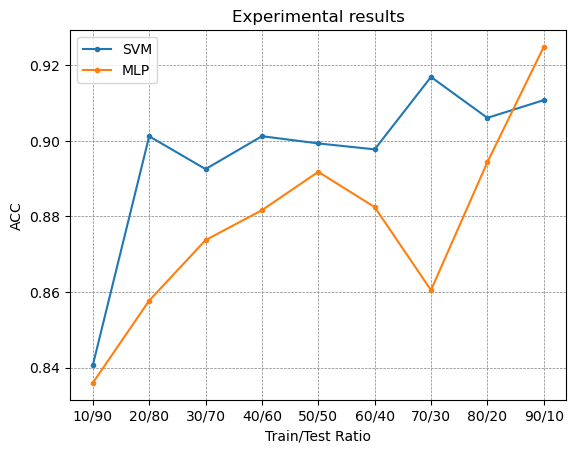

In [42]:
# Se agregan los títulos del gráfico y los ejes
plt.title("Experimental results")
plt.ylabel("ACC")
plt.xlabel("Train/Test Ratio")

# Agrega una rejilla
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Agrega una etiqueta a la línea del gráfico
plt.plot(all_experiments, marker = '.')

# Agrega la leyenda al gráfico en la esquina superior izq
plt.legend(["SVM", "MLP"], loc="upper left")

# Se renderiza
plt.show()

3. Programa la forma de ejecutar los dos métodos de clasificación, de tal forma que se ejecuten ambos $10$ veces, y se muestre la representación gráfica del punto $2$, pero en este caso considerando su valor medio y desviación estándar.

- Un ejemplo de gráfica en la que se representaría la media y la desviación estándar sería de la siguiente forma:
    
    <img src="pics/GraficosBarrasError.png" width="50%">

<p><span style="font-size:16px"><u><strong><span style="color:#e74c3c">Nota importante:</span></strong></u></span></p>

<p><span style="font-size:16px"><span style="color:#e74c3c">Este codigo realiza el proceso de entrenamiento de los modelos 10 veces para cada experimento. Solo ejecutar esta celda si se quiere repetir el experimento.</span></span></p>


<p><span style="color:#8e44ad"><span>En primer lugar, repetimos cada experimento 10 veces y guardamos los resultados en disco.</span></span></p>

<p><span style="color:#8e44ad"><span>Cada una de las 10 evaluaciones de un experimento, ser&aacute;n almacenadas en la misma carpeta.</span></span></p>

<p><span style="color:#8e44ad"><span>Este proceso puede ser muy tedioso y durar mucho, por lo que si se desea no repetir los experimentos en el futuro, simplemente cargamos los resultados desde el disco duro. </span></span></p>

<p><span style="color:#8e44ad"><span>Se recomienda usar el notebook mediante Google Colab, así tu ordenador no esta 5 horas seguidas para repetir los experimentos 10 veces</span></span></p>

<img src="pics/colab.png" width="700 px"></img>



<p><span style="color:#8e44ad">Este c&oacute;digo define una variable <code>base_dir_10</code> que contiene la ruta a un directorio en el que se guardar&aacute;n los resultados del experimento. Luego, intenta crear el directorio con <code>os.mkdir()</code>. Si el directorio ya existe, la operaci&oacute;n se ignora y se pasa a la siguiente secci&oacute;n del c&oacute;digo.</span></p>

<p><span style="color:#8e44ad">La siguiente secci&oacute;n del c&oacute;digo contiene un bucle que se repite para cada versi&oacute;n del experimento. Para cada versi&oacute;n del experimento, se crea una carpeta en el directorio <code>base_dir_10</code> donde se guardar&aacute;n los resultados del experimento. Luego, se repite el experimento 10 veces y se guardan los resultados en la carpeta creada anteriormente.</span></p>


In [ ]:
base_dir_10 = "test_10"

# Se crea el directorio si no existe
try:
    os.mkdir(base_dir_10)
except OSError as e:
    pass

# Para cada vesion del experimento
for i in range (90, 100, 10):

    # Crear una carpeta donde guardar los 10 resultados del experimiento
    k = 100 - i
    experiment_folder =  base_dir_10 + os.sep + "PrediccionesFetalHealth_" + str(i) + "_" +str(k)
    try:
        os.mkdir(experiment_folder)
    except OSError as e:
        pass

    # Repetimos el experimento 10 veces y lo guardamos en su carpeta
    filename_key = experiment_folder + os.sep + "PrediccionesFetalHealth_" + str(i) + "_" +str(k)
    for j in range (1, 11):
        file_path = filename_key + "_" + str(j) + ".obj"
        test_percent = k/100
        run_all_save(file_path, test_percent)


<p><span style="color:#8e44ad">Una vez realizados los experimentos, cargamos sus datos y los procesamos para obtener medias y desviaciones:</span></p>
<p><span style="color:#8e44ad">Este c&oacute;digo importa dos funciones (<code>mean</code> y <code>pstdev</code>) de la biblioteca <code>statistics</code>, luego define una funci&oacute;n <code>calculate_statistics()</code> que utiliza estas dos funciones para calcular la media y la desviaci&oacute;n est&aacute;ndar de una lista de resultados.</span></p>

<p><span style="color:#8e44ad">Luego, declara un diccionario llamado <code>results</code> que se utilizar&aacute; para almacenar los resultados del experimento. El diccionario contiene dos entradas, &quot;svm&quot; y &quot;mlp&quot;, cada una de las cuales contiene un diccionario con dos entradas, &quot;mean&quot; y &quot;stdev&quot;, que se usar&aacute;n para almacenar la media y la desviaci&oacute;n est&aacute;ndar de los resultados del clasificador correspondiente.</span></p>

<p><span style="color:#8e44ad">En la siguiente secci&oacute;n del c&oacute;digo, se define una variable <code>base_dir_10</code> que contiene la ruta a un directorio que contiene subdirectorios con los resultados de diferentes versiones del experimento. Luego, se recorren todos los subdirectorios en <code>base_dir_10</code> y se leen los archivos de resultados en cada subdirectorio. Los resultados se almacenan en dos listas distintas, una para cada clasificador (SVM y MLP).</span></p>

<p><span style="color:#8e44ad">Una vez que se han le&iacute;do todos los archivos de resultados en un subdirectorio, se usa la funci&oacute;n <code>calculate_statistics()</code> para calcular la media y la desviaci&oacute;n est&aacute;ndar de los resultados para cada clasificador. Estos valores se almacenan en el diccionario <code>results</code> en las entradas correspondientes. Luego, se repite este proceso para cada subdirectorio en <code>base_dir_10</code></span></p>


In [46]:
from statistics import mean, pstdev

def calculate_statistics(results):
    """Calcula la media y la desviación estándar de una lista de resultados"""
    return mean(results), pstdev(results)

# Declaramos un diccionario para guardar los resultados del experimento
results = {
    "svm": {"mean": [], "stdev": []},
    "mlp": {"mean": [], "stdev": []},
}

# Repetimos lo mismo para cada version del experimento
base_dir_10 = "test_10"
for experiment_version_folder in os.listdir(base_dir_10):

    svm_result_list = []
    mlp_result_list = []

    # Leemos el archivo con los resultados del experimento y guardamos el
    # resultado (en memoria) en una lista distinta para cada clasificador
    f_path = base_dir_10 + os.sep + experiment_version_folder
    for experiment in os.listdir(f_path):

        experiment = f_path + os.sep + experiment

        result = get_results(experiment)["Acc"].astype(float)
        svm_result_list.append(result["SVM"][0])
        mlp_result_list.append(result["MLP"][0])

    # Se calcula el valor de la media y desviacion para cada clasificador
    svm_acc_mean, svm_acc_stdev = calculate_statistics(svm_result_list)
    mlp_acc_mean, mlp_acc_stdev = calculate_statistics(mlp_result_list)

    results["svm"]["mean"].append(svm_acc_mean)
    results["mlp"]["mean"].append(mlp_acc_mean)
    results["svm"]["stdev"].append(svm_acc_stdev)
    results["mlp"]["stdev"].append(mlp_acc_stdev)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p><span style="color:#8e44ad">Este c&oacute;digo se encarga de visualizar los resultados de un experimento utilizando matplotlib.pyplot. </span></p>

<ol>
	<li><span style="color:#8e44ad">Primero se establece el t&iacute;tulo y los nombres de los ejes x e y. </span></li>
	<li><span style="color:#8e44ad">Luego se agrega una rejilla al gr&aacute;fico. </span></li>
	<li><span style="color:#8e44ad">Despu&eacute;s, se cargan los resultados del experimento en dos variables: svm_means y mlp_means para las medias, y svm_stdev y mlp_stdev para las desviaciones est&aacute;ndar. </span></li>
	<li><span style="color:#8e44ad">A continuaci&oacute;n, se grafican las medias de los resultados de SVM y MLP en el gr&aacute;fico. </span></li>
	<li><span style="color:#8e44ad">Despu&eacute;s, se calculan y grafican las desviaciones est&aacute;ndar de SVM y MLP en el gr&aacute;fico como bandas sombreadas. </span></li>
	<li><span style="color:#8e44ad">Finalmente, se a&ntilde;aden las etiquetas para el eje x, se agrega una leyenda y se muestra el gr&aacute;fico.</span></li>
</ol>


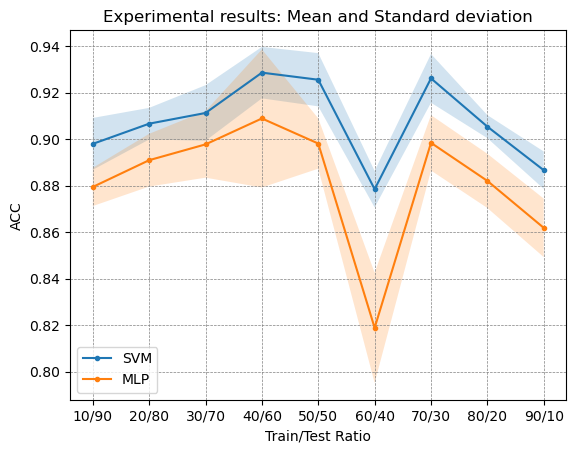

In [47]:
plt.title("Experimental results: Mean and Standard deviation")

plt.ylabel("ACC")
plt.xlabel("Train/Test Ratio")

# Agrega una rejilla
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Obtenemos las medias y desviaciones estándar para SVM
svm_means = results["svm"]["mean"]
svm_stdev = results["svm"]["stdev"]

# Obtenemos las medias y desviaciones estándar para MLP
mlp_means = results["mlp"]["mean"]
mlp_stdev = results["mlp"]["stdev"]

# Graficamos las medias de SVM y MLP
plt.plot(svm_means, marker = '.')
plt.plot(mlp_means, marker = '.')

# Calculamos el rango de zona sombreada que representará la desviación estándar
svm_less = np.array(svm_means) - np.array(svm_stdev)
svm_plus = np.array(svm_means) + np.array(svm_stdev)

mlp_less = np.array(mlp_means) - np.array(mlp_stdev)
mlp_plus = np.array(mlp_means) + np.array(mlp_stdev)

# Graficamos las desviaciones estándar de SVM y MLP
plt.fill_between(range(len(svm_means)), svm_less, svm_plus, alpha=0.2)
plt.fill_between(range(len(mlp_means)), mlp_less, mlp_plus, alpha=0.2)

# Añadimos la "guia" en el eje x
plt.xticks(
    ticks   = [ 0, 1, 2, 3, 4, 5, 6, 7, 8], 
    labels  = ["10/90", "20/80","30/70","40/60","50/50","60/40","70/30","80/20","90/10"]
)

# Agrega la leyenda al gráfico en la esquina superior izq
plt.legend(["SVM", "MLP"], loc="lower left")

# Mostramos la gráfica
plt.show()
